## 1) Import packages and dataset

In [158]:
# import basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 100
pd.options.display.max_rows = 1000

In [159]:
# load data

df_raw = pd.read_csv('drug_consumption.csv')
df_raw.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## 2) Data exploration...

In [161]:
df_raw.ID.unique().shape[0] == df.shape[0]  # --> no duplicates, ID can be dropped

True

In [260]:
df_raw.isna().sum()  # --> no missing values

ID           0
Age          0
Gender       0
Education    0
Country      0
Ethnicity    0
Nscore       0
Escore       0
Oscore       0
Ascore       0
Cscore       0
Impulsive    0
SS           0
Alcohol      0
Amphet       0
Amyl         0
Benzos       0
Caff         0
Cannabis     0
Choc         0
Coke         0
Crack        0
Ecstasy      0
Heroin       0
Ketamine     0
Legalh       0
LSD          0
Meth         0
Shrooms      0
Nicotine     0
Semer        0
VSA          0
dtype: int64

In [261]:
df_raw.dtypes  # --> features all float, targets all object

ID             int64
Age          float64
Gender       float64
Education    float64
Country      float64
Ethnicity    float64
Nscore       float64
Escore       float64
Oscore       float64
Ascore       float64
Cscore       float64
Impulsive    float64
SS           float64
Alcohol       object
Amphet        object
Amyl          object
Benzos        object
Caff          object
Cannabis      object
Choc          object
Coke          object
Crack         object
Ecstasy       object
Heroin        object
Ketamine      object
Legalh        object
LSD           object
Meth          object
Shrooms       object
Nicotine      object
Semer         object
VSA           object
dtype: object

In [45]:
df.Ethnicity.value_counts() #.sort_index()

-0.31685    1720
 0.11440      63
-1.10702      33
-0.50212      26
-0.22166      20
 0.12600      20
 1.90725       3
Name: Ethnicity, dtype: int64

In [43]:
df.Age.value_counts().sort_index()

-0.95197    643
-0.07854    481
 0.49788    356
 1.09449    294
 1.82213     93
 2.59171     18
Name: Age, dtype: int64

In [47]:
df.Country.value_counts()

 0.96082    1044
-0.57009     557
-0.28519     118
 0.24923      87
-0.09765      54
 0.21128      20
-0.46841       5
Name: Country, dtype: int64

## 3) Data preparation for modeling

In [165]:
# Definition 1:
# CL0	Never Used
# CL1	Used over a Decade Ago
#--------------------
# CL2	Used in Last Decade
# CL3	Used in Last Year
# CL4	Used in Last Month
# CL5	Used in Last Week
# CL6	Used in Last Day

df1 = df_raw.iloc[:,1:13].copy()

Cannabis_1 = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df_raw.Cannabis], name='Cannabis')
Ecstasy_1 = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df_raw.Ecstasy], name='Ecstasy')
Heroin_1 = pd.Series([0 if x=='CL0' or x=='CL1' else 1 for x in df_raw.Heroin], name='Heroin')

df1 = pd.concat([df1, Cannabis_1, Ecstasy_1, Heroin_1], axis=1)
df1.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Ecstasy,Heroin
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0


In [166]:
# Definition 2:
# CL0	Never Used
# CL1	Used over a Decade Ago
# CL2	Used in Last Decade
#--------------------
# CL3	Used in Last Year
# CL4	Used in Last Month
# CL5	Used in Last Week
# CL6	Used in Last Day

df2 = df_raw.iloc[:,1:13].copy()

Cannabis_2 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df_raw.Cannabis], name='Cannabis')
Ecstasy_2 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df_raw.Ecstasy], name='Ecstasy')
Heroin_2 = pd.Series([0 if x=='CL0' or x=='CL1' or x=='CL2' else 1 for x in df_raw.Heroin], name='Heroin')

df2 = pd.concat([df2, Cannabis_2, Ecstasy_2, Heroin_2], axis=1)
df2.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis,Ecstasy,Heroin
0,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,0
1,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1,1,0
2,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,1,0,0
3,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0,0,0
4,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,1,0,0


In [345]:
# recode Age, Gender, Education, Country, Ethnicity

df_text = df_raw.iloc[:,1:13].copy()

# Gender
df_text.Gender[df_raw.Gender < 0] = 'male'
df_text.Gender[df_raw.Gender > 0] = 'female'

# Age ... [ 0.49788, -0.07854, -0.95197,  2.59171,  1.09449,  1.82213]
# Country... [ 0.96082,  0.24923, -0.57009, -0.28519, -0.09765,  0.21128, -0.46841]
# Education... [-0.05921,  1.98437,  1.16365, -1.22751, -1.7379 ,  0.45468, -0.61113, -2.43591, -1.43719]
# Ethnicity... [ 0.126  , -0.31685,  0.1144 , -0.22166, -0.50212, -1.10702, 1.90725]

df_text.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
0,0.49788,female,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,-0.07854,male,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,0.49788,male,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,-0.95197,female,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,0.49788,female,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575


In [357]:
df_text.Gender = pd.Categorical(df_text.Gender)
df_text.dtypes

Age           float64
Gender       category
Education     float64
Country       float64
Ethnicity     float64
Nscore        float64
Escore        float64
Oscore        float64
Ascore        float64
Cscore        float64
Impulsive     float64
SS            float64
dtype: object

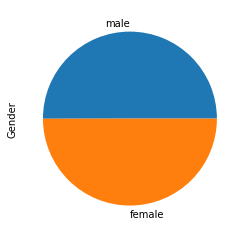

In [348]:
df_text.Gender.value_counts().plot(kind='pie');

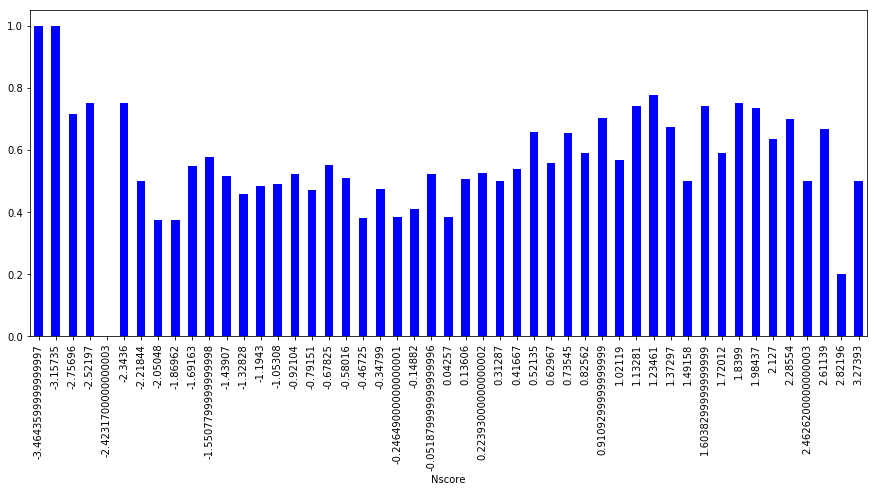

In [288]:
df2.groupby('Nscore').mean().Cannabis.plot(kind='bar', figsize=(15,6), color='blue');

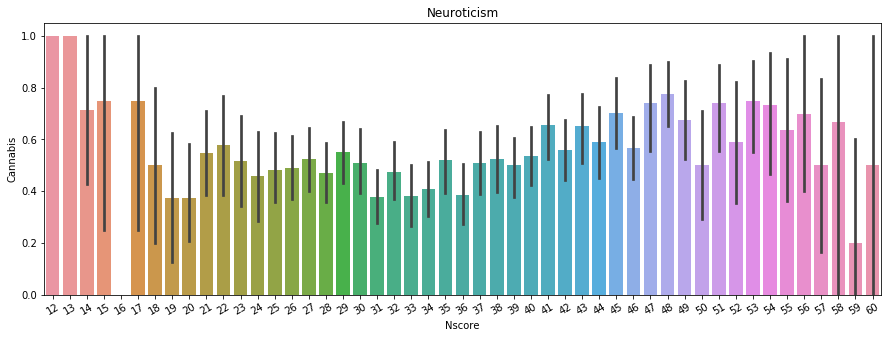

In [311]:
fig, ax = plt.subplots(figsize=(15,5))
#Nscore_barplot = df2.groupby('Nscore').mean().Cannabis
sns.barplot(df2.Nscore, df2.Cannabis) #Nscore_barplot)
plt.title('Neuroticism')
plt.xticks(rotation=30, ticks=list(range(0,49)), labels=list(range(12,61)));

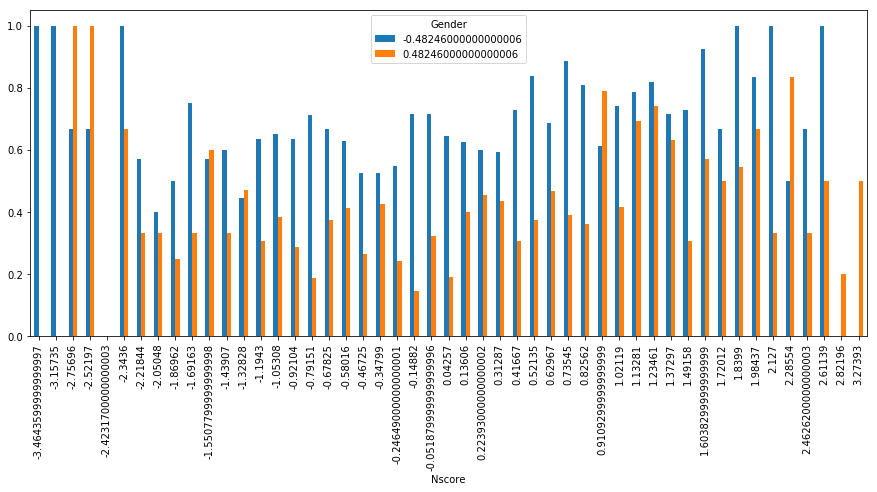

In [312]:
pd.crosstab(index=df2.Nscore, 
            columns=df2.Gender, 
            values=df2.Cannabis, 
            aggfunc=np.mean).plot(kind='bar', figsize=(15,6));

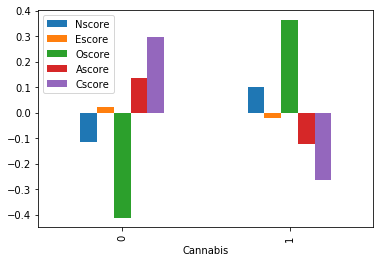

In [335]:
df2.groupby('Cannabis').mean().loc[:,['Nscore','Escore','Oscore','Ascore','Cscore']].plot(kind='bar');

## Modeling

In [167]:
# prepare data for modeling

df = df1.copy()
drug = 'Cannabis'

X = df.iloc[:,:12]
y = df[drug]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [246]:
# Build function that fits model and returns evaluation metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

def fit_eval_classifier(clf, X_train, X_test, y_train, y_test):
     
    eval_metrics = {}
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    #eval_metrics['model'] = clf.__class__.__name__
    eval_metrics['acc'] = accuracy_score(y_test, y_pred)
    eval_metrics['recall'] = recall_score(y_test, y_pred)
    eval_metrics['precision'] = precision_score(y_test, y_pred)
    eval_metrics['f1_score'] = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)  #.ravel()
    
    return eval_metrics, cm, y_pred

In [247]:
# select different models

# Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# Initialize the models and configure classifiers
dt  = DecisionTreeClassifier()
rf  = RandomForestClassifier()
knn = KNeighborsClassifier()
nb  = GaussianNB()
svm1 = SVC(gamma='auto')
svm2 = SVC(gamma='scale')
ada = AdaBoostClassifier()

all_models = [dt, rf, knn, nb, svm1, svm2, ada]

In [248]:
# output evaluation metrics for each model

eval_list, clf_list = [], []
    
for clf in all_models:
    eval_metrics, _, _ = fit_eval_classifier(clf, X_train, X_test, y_train, y_test)
    eval_list.append(eval_metrics) 
    clf_list.append(clf.__class__.__name__)

eval_df = pd.DataFrame(eval_list, index = clf_list)

with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(eval_df)

/Users/kacha/opt/anaconda3/envs/nf/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,acc,f1_score,precision,recall
DecisionTreeClassifier,0.76,0.81,0.82,0.81
RandomForestClassifier,0.80,0.85,0.85,0.85
KNeighborsClassifier,0.78,0.84,0.83,0.85
GaussianNB,0.79,0.83,0.88,0.79
SVC,0.81,0.86,0.83,0.89
SVC,0.82,0.87,0.84,0.90
AdaBoostClassifier,0.80,0.85,0.86,0.84


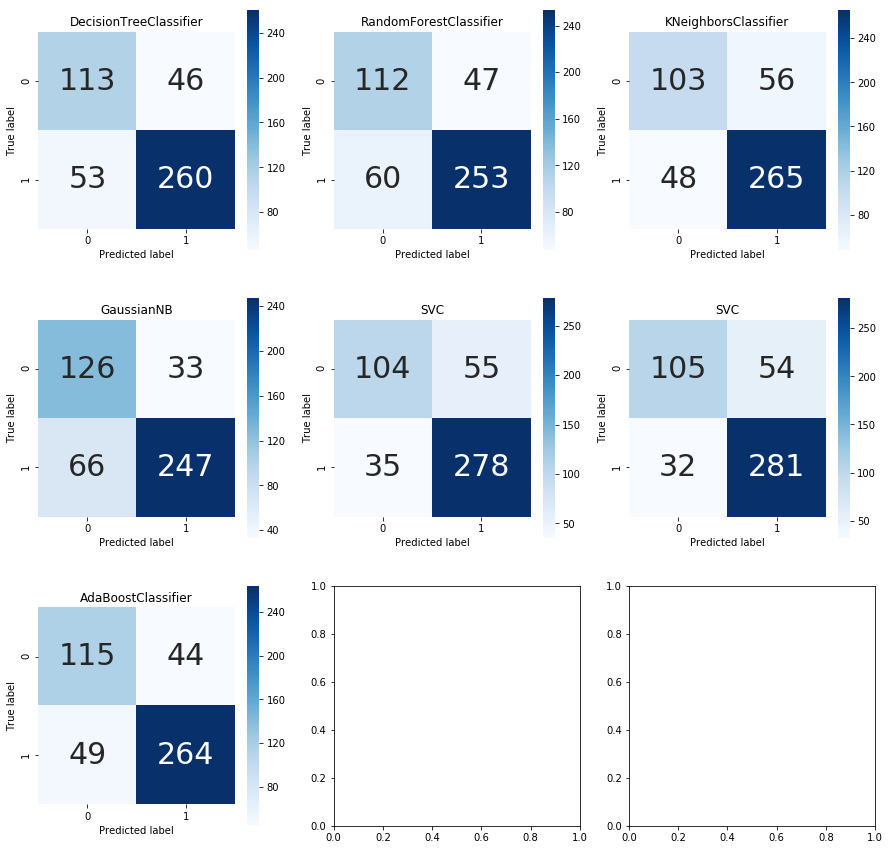

In [249]:
# plot confusion matrices of all models

n_col_plot = 3
n_row_plot = int(np.ceil(len(all_models)/3))
plt.subplots(n_row_plot, n_col_plot, figsize=(15,5*n_row_plot))

for i, clf in enumerate(all_models, start=1):
    
    plt.subplot(n_row_plot, n_col_plot, i)
    _, cm, _ = fit_eval_classifier(clf, X_train, X_test, y_train, y_test)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, cmap='Blues', square=True, fmt='.0f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title(clf.__class__.__name__);  

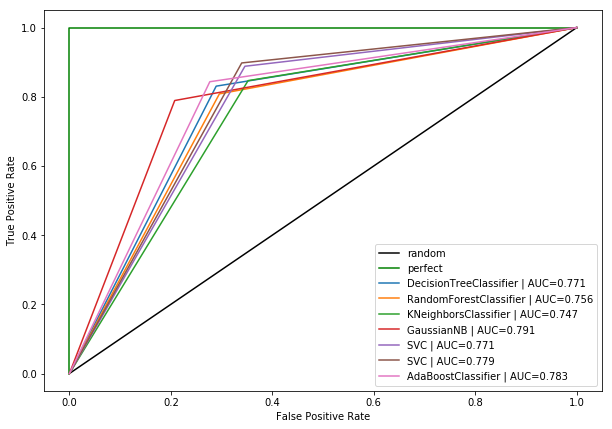

In [258]:
from sklearn.metrics import roc_curve, roc_auc_score

fig, ax = plt.subplots(figsize=(10,7))
plt.plot([0,1],[0,1],'k-',label='random')
plt.plot([0,0,1,1],[0,1,1,1],'g-',label='perfect')

for i, clf in enumerate(all_models, start=1):
    
    fpr, tpr, thresholds_RF = roc_curve(y_test, clf.predict(X_test))
    auc = roc_auc_score(y_test, clf.predict(X_test))
    plt.plot(fpr, tpr, label='%s | AUC=%.3f'%(clf.__class__.__name__, auc))  #,'r-',label = 'RF AUC: %.3f'%auc_RF)   
    
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

## Possible visualizations of model results (in addition to CM & ROC)

### Decision Trees: plot tree with graphviz

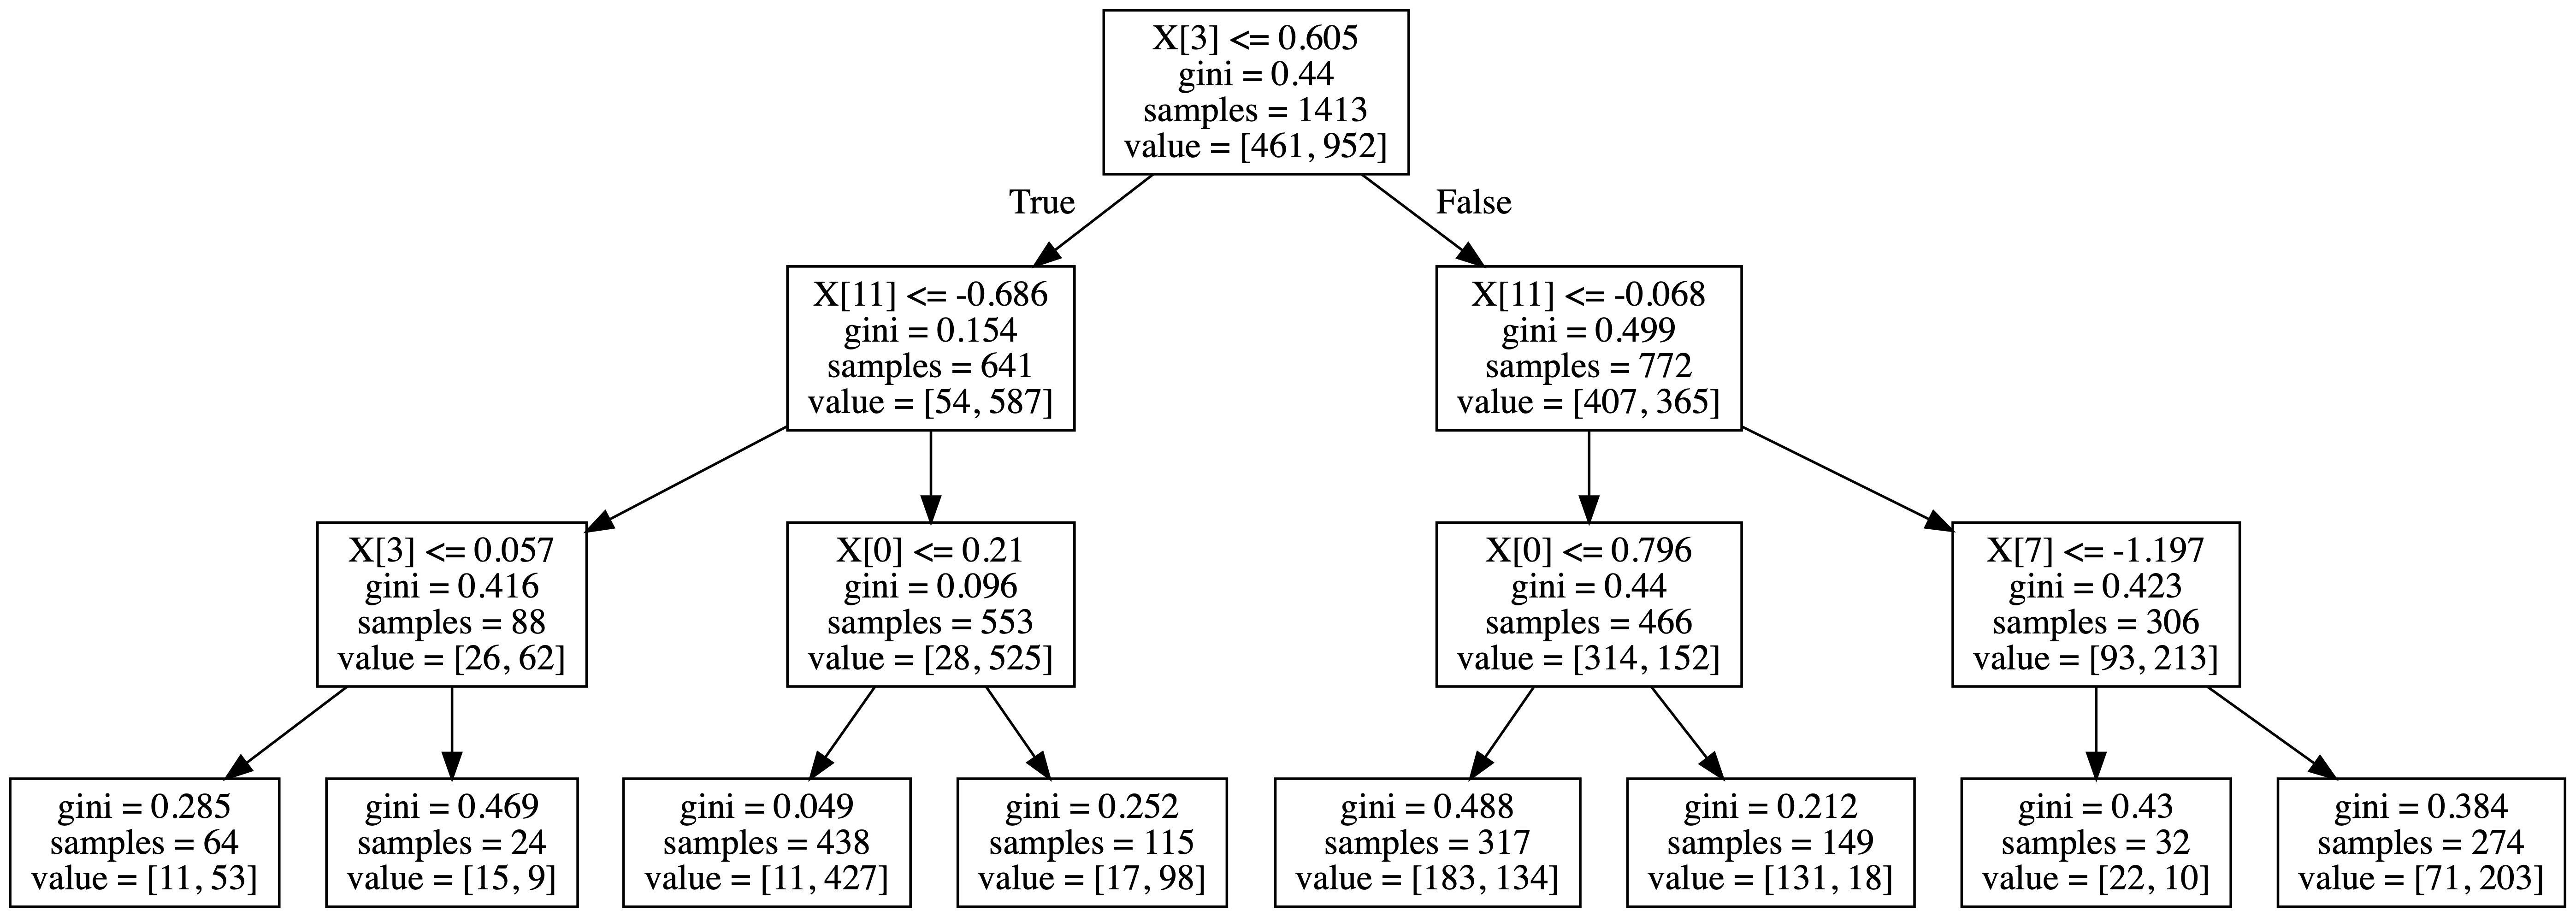

In [259]:
#import export_graphviz 
from sklearn.tree import export_graphviz  

# fit model
dt_small = DecisionTreeClassifier(random_state=0, max_depth=3)
dt_small.fit(X_train,y_train)

# export decision tree to a tree.dot file for visualizing the plot easily anywhere 
export_graphviz(dt2, out_file ='tree.dot') 

# Convert to png
from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=400']);

# display
from IPython.display import Image
Image('tree2.png')

In [340]:
dt_small.feature_importances_

array([0.08992338, 0.        , 0.        , 0.61275592, 0.        ,
       0.        , 0.        , 0.04456336, 0.        , 0.        ,
       0.        , 0.25275735])

### SVC: see notebook